In [19]:
# pandas
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
train_df = pd.read_csv('training_set_VU_DM.csv', nrows=10000)
test_df    = pd.read_csv('test_set_VU_DM.csv', nrows=10000)
data=train_df
data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [22]:
display(train_df.describe())

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,10000.000000,10000.000000,10000.000000,497.000000,497.000000,10000.000000,10000.000000,10000.000000,9983.000000,10000.000000,...,259.000000,783.000000,919.000000,362.000000,4060.000000,4189.000000,1275.000000,10000.000000,281.000000,10000.000000
mean,353.842700,9.949100,172.925600,3.261247,176.708068,171.329500,69987.360100,3.169400,3.782330,0.625200,...,22.826255,0.189017,0.095756,21.662983,-0.058867,0.008355,14.184314,0.045700,409.795516,0.028100
std,204.427699,7.532396,67.120119,0.587007,63.694472,69.688138,40584.999229,1.063681,1.035365,0.484095,...,68.913528,0.598405,0.339122,47.256502,0.462150,0.190953,12.526822,0.208844,551.617038,0.165267
min,1.000000,2.000000,4.000000,2.300000,74.790000,4.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,26.460000,0.000000
25%,162.000000,5.000000,100.000000,2.570000,122.510000,100.000000,34802.000000,3.000000,3.500000,0.000000,...,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000,125.210000,0.000000
50%,365.000000,5.000000,219.000000,3.260000,180.750000,219.000000,69701.500000,3.000000,4.000000,1.000000,...,12.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,209.500000,0.000000
75%,533.000000,14.000000,219.000000,3.720000,210.600000,219.000000,104517.000000,4.000000,4.500000,1.000000,...,21.000000,1.000000,0.000000,21.000000,0.000000,0.000000,17.000000,0.000000,490.360000,0.000000
max,703.000000,34.000000,224.000000,5.000000,390.570000,225.000000,140816.000000,5.000000,5.000000,1.000000,...,985.000000,1.000000,1.000000,527.000000,1.000000,1.000000,153.000000,1.000000,4491.280000,1.000000


In [23]:
data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   srch_id                      10000 non-null  int64  
 1   date_time                    10000 non-null  object 
 2   site_id                      10000 non-null  int64  
 3   visitor_location_country_id  10000 non-null  int64  
 4   visitor_hist_starrating      497 non-null    float64
 5   visitor_hist_adr_usd         497 non-null    float64
 6   prop_country_id              10000 non-null  int64  
 7   prop_id                      10000 non-null  int64  
 8   prop_starrating              10000 non-null  int64  
 9   prop_review_score            9983 non-null   float64
 10  prop_brand_bool              10000 non-null  int64  
 11  prop_location_score1         10000 non-null  float64
 12  prop_location_score2         7731 non-null   float64
 13  prop_log_historic

In [25]:
data.isnull().sum(axis=0)

srch_id                           0
date_time                         0
site_id                           0
visitor_location_country_id       0
visitor_hist_starrating        9503
visitor_hist_adr_usd           9503
prop_country_id                   0
prop_id                           0
prop_starrating                   0
prop_review_score                17
prop_brand_bool                   0
prop_location_score1              0
prop_location_score2           2269
prop_log_historical_price         0
position                          0
price_usd                         0
promotion_flag                    0
srch_destination_id               0
srch_length_of_stay               0
srch_booking_window               0
srch_adults_count                 0
srch_children_count               0
srch_room_count                   0
srch_saturday_night_bool          0
srch_query_affinity_score      9460
orig_destination_distance      3204
random_bool                       0
comp1_rate                  

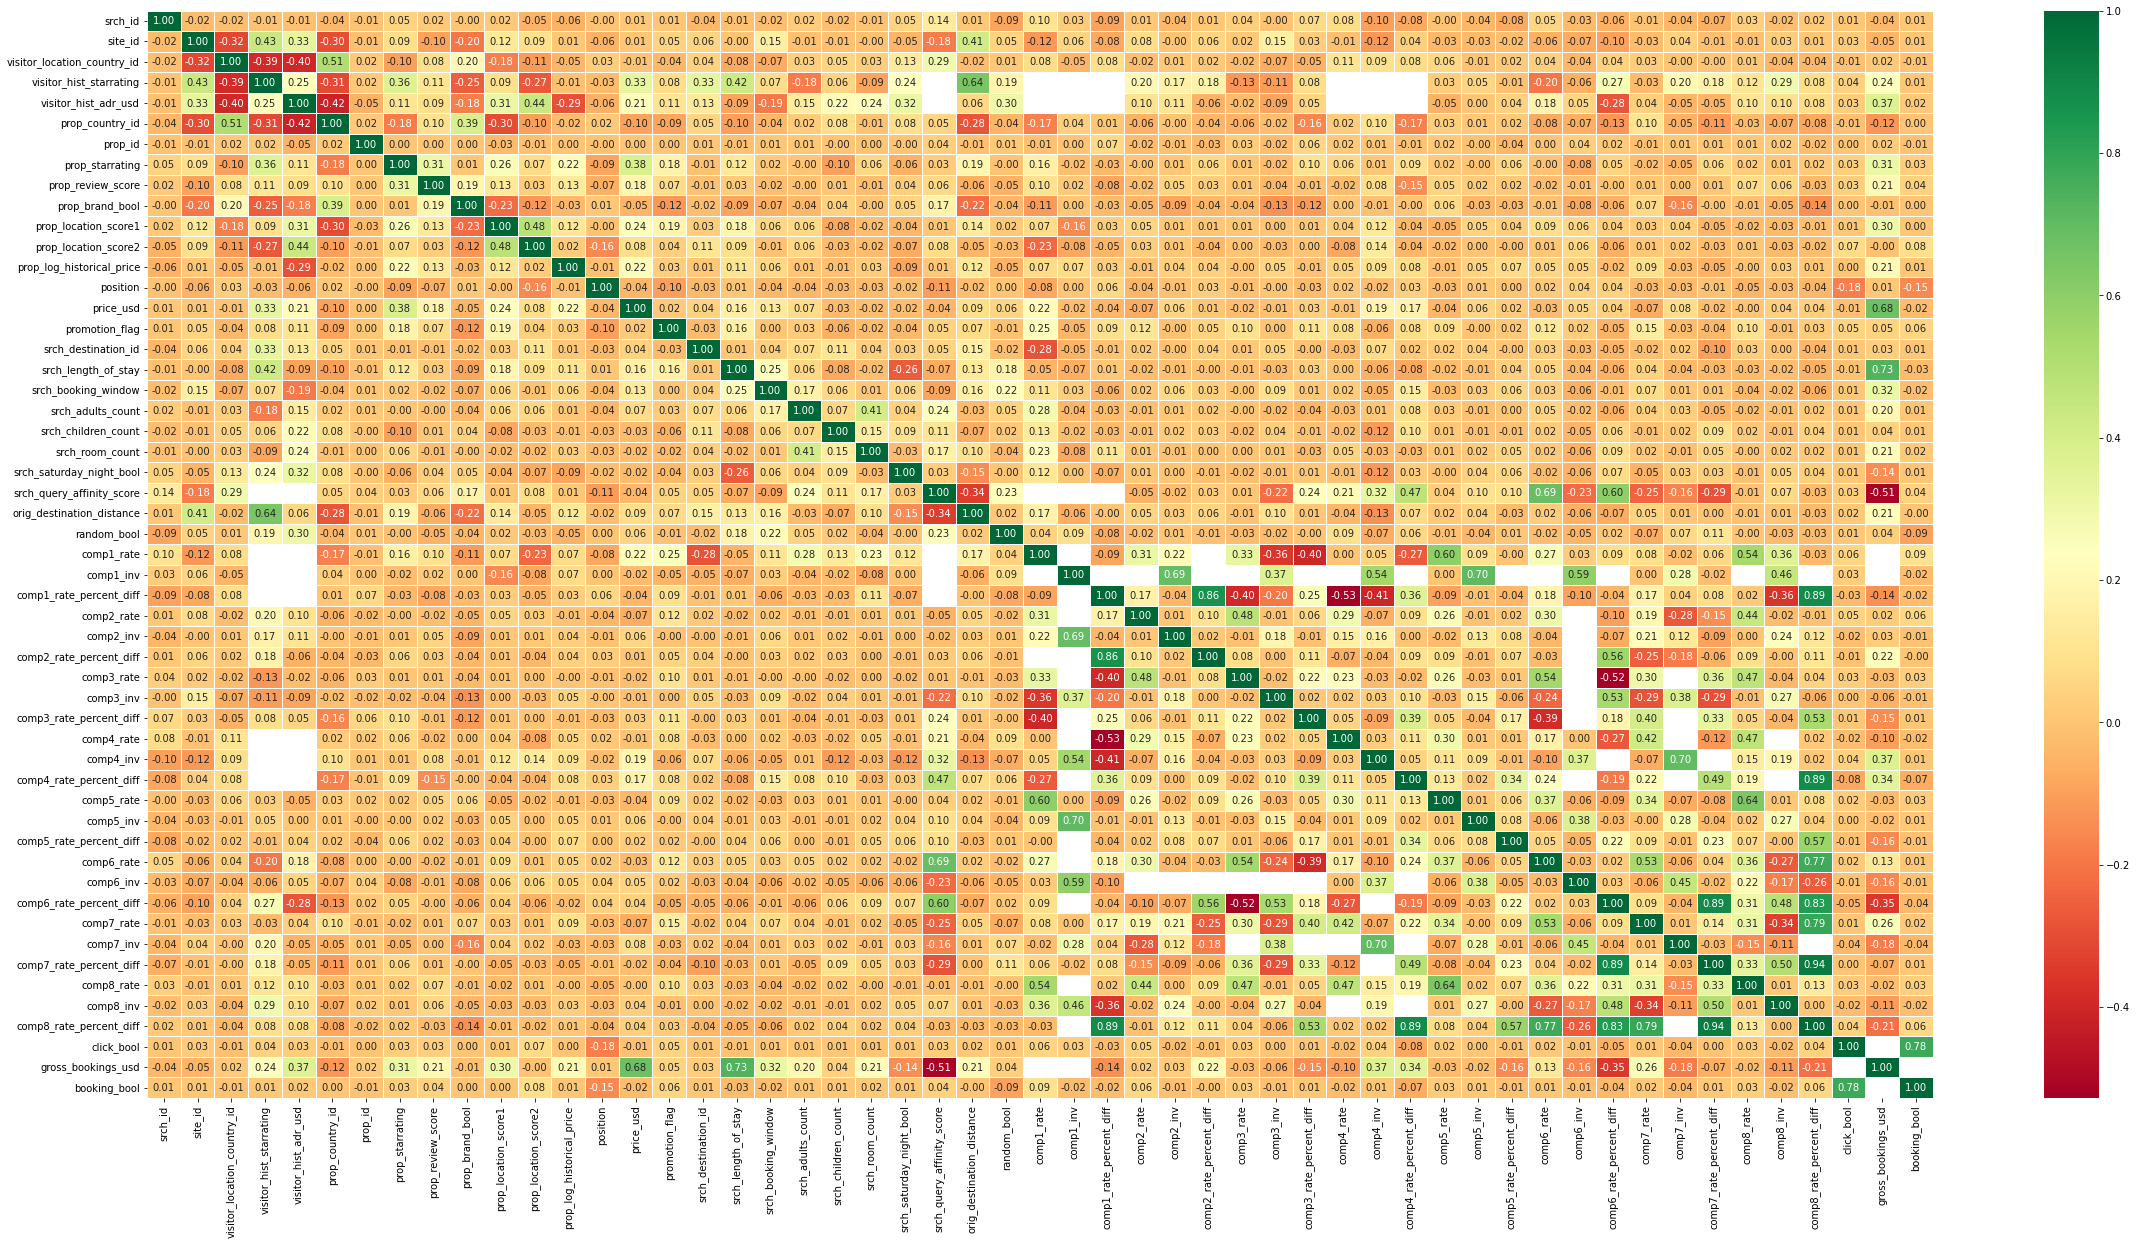

In [50]:
corr = data.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

# 0~5

In [79]:
#date_time to year +month
#visitor_hist_starrating      497 non-null    float64 delete?
#visitor_hist_adr_usd         497 non-null    float64 delete?


# 17-25

In [83]:
data1=data.iloc[:,17:26]
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   srch_destination_id        10000 non-null  int64  
 1   srch_length_of_stay        10000 non-null  int64  
 2   srch_booking_window        10000 non-null  int64  
 3   srch_adults_count          10000 non-null  int64  
 4   srch_children_count        10000 non-null  int64  
 5   srch_room_count            10000 non-null  int64  
 6   srch_saturday_night_bool   10000 non-null  int64  
 7   srch_query_affinity_score  540 non-null    float64
 8   orig_destination_distance  6796 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


srch_destination_id              AxesSubplot(0.125,0.71587;0.133621x0.16413)
srch_length_of_stay           AxesSubplot(0.285345,0.71587;0.133621x0.16413)
srch_booking_window            AxesSubplot(0.44569,0.71587;0.133621x0.16413)
srch_adults_count             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
srch_children_count           AxesSubplot(0.766379,0.71587;0.133621x0.16413)
srch_room_count                 AxesSubplot(0.125,0.518913;0.133621x0.16413)
srch_saturday_night_bool     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
srch_query_affinity_score     AxesSubplot(0.44569,0.518913;0.133621x0.16413)
orig_destination_distance    AxesSubplot(0.606034,0.518913;0.133621x0.16413)
dtype: object

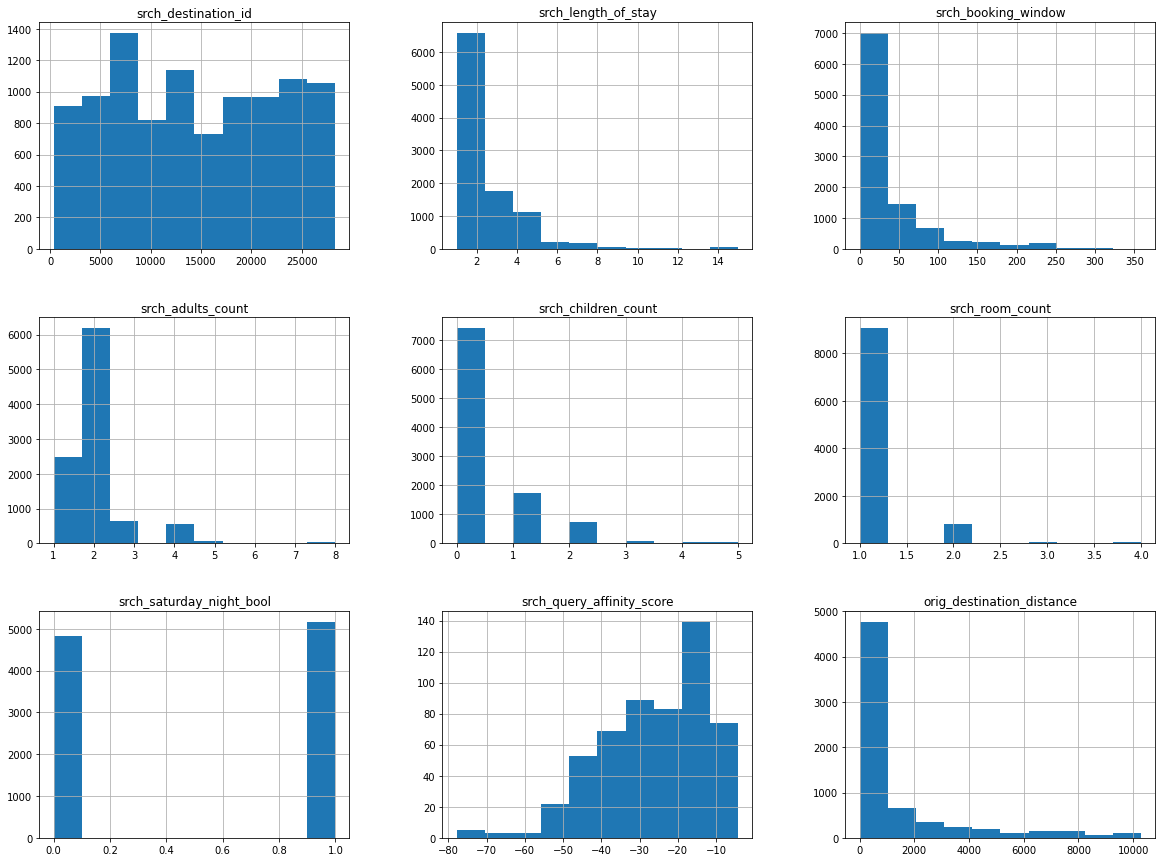

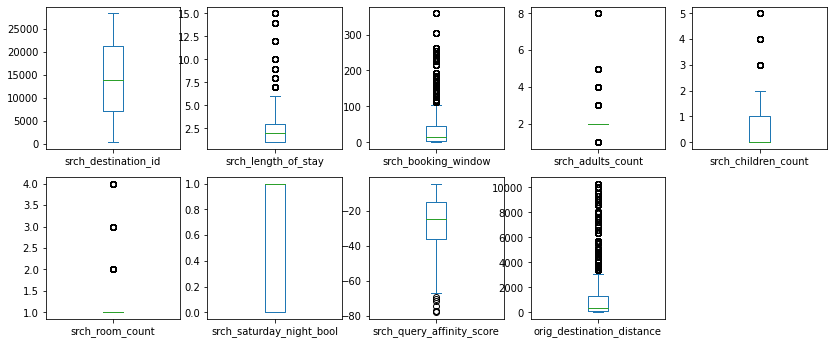

In [86]:
data1.hist(figsize=(20,15))
data1.plot(kind='box', subplots=True, layout=(4,5),figsize=(14,12))

# 27~50 Comp

In [75]:
#currently not consider the compare hotel
data = data.drop(columns=['comp1_rate','comp1_inv','comp1_rate_percent_diff','comp2_rate','comp2_inv','comp2_rate_percent_diff','comp3_rate','comp3_inv','comp3_rate_percent_diff','comp4_rate','comp4_inv','comp4_rate_percent_diff','comp5_rate','comp5_inv','comp5_rate_percent_diff','comp6_rate','comp6_inv','comp6_rate_percent_diff','comp7_rate','comp7_inv','comp7_rate_percent_diff','comp8_rate','comp8_inv','comp8_rate_percent_diff'])

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   srch_id                      10000 non-null  int64  
 1   date_time                    10000 non-null  object 
 2   site_id                      10000 non-null  int64  
 3   visitor_location_country_id  10000 non-null  int64  
 4   visitor_hist_starrating      497 non-null    float64
 5   visitor_hist_adr_usd         497 non-null    float64
 6   prop_country_id              10000 non-null  int64  
 7   prop_id                      10000 non-null  int64  
 8   prop_starrating              10000 non-null  int64  
 9   prop_review_score            9983 non-null   float64
 10  prop_brand_bool              10000 non-null  int64  
 11  prop_location_score1         10000 non-null  float64
 12  prop_location_score2         7731 non-null   float64
 13  prop_log_historic

# 6~16 Prop

In [30]:
data2=data.iloc[:,6:17]

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   prop_country_id            10000 non-null  int64  
 1   prop_id                    10000 non-null  int64  
 2   prop_starrating            10000 non-null  int64  
 3   prop_review_score          9983 non-null   float64
 4   prop_brand_bool            10000 non-null  int64  
 5   prop_location_score1       10000 non-null  float64
 6   prop_location_score2       7731 non-null   float64
 7   prop_log_historical_price  10000 non-null  float64
 8   position                   10000 non-null  int64  
 9   price_usd                  10000 non-null  float64
 10  promotion_flag             10000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 859.5 KB


array([[<AxesSubplot:title={'center':'prop_brand_bool'}>,
        <AxesSubplot:title={'center':'promotion_flag'}>]], dtype=object)

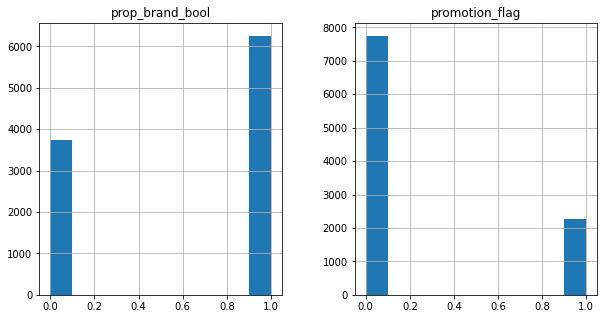

In [64]:
#category data: prop_brand_bool,promotion_flag
data2Cat=data2.loc[:,['prop_brand_bool','promotion_flag']]
data2Cat.hist(figsize=(10,5))


prop_country_id                  AxesSubplot(0.125,0.71587;0.133621x0.16413)
prop_id                       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
prop_starrating                AxesSubplot(0.44569,0.71587;0.133621x0.16413)
prop_review_score             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
prop_location_score1          AxesSubplot(0.766379,0.71587;0.133621x0.16413)
prop_location_score2            AxesSubplot(0.125,0.518913;0.133621x0.16413)
prop_log_historical_price    AxesSubplot(0.285345,0.518913;0.133621x0.16413)
position                      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
price_usd                    AxesSubplot(0.606034,0.518913;0.133621x0.16413)
dtype: object

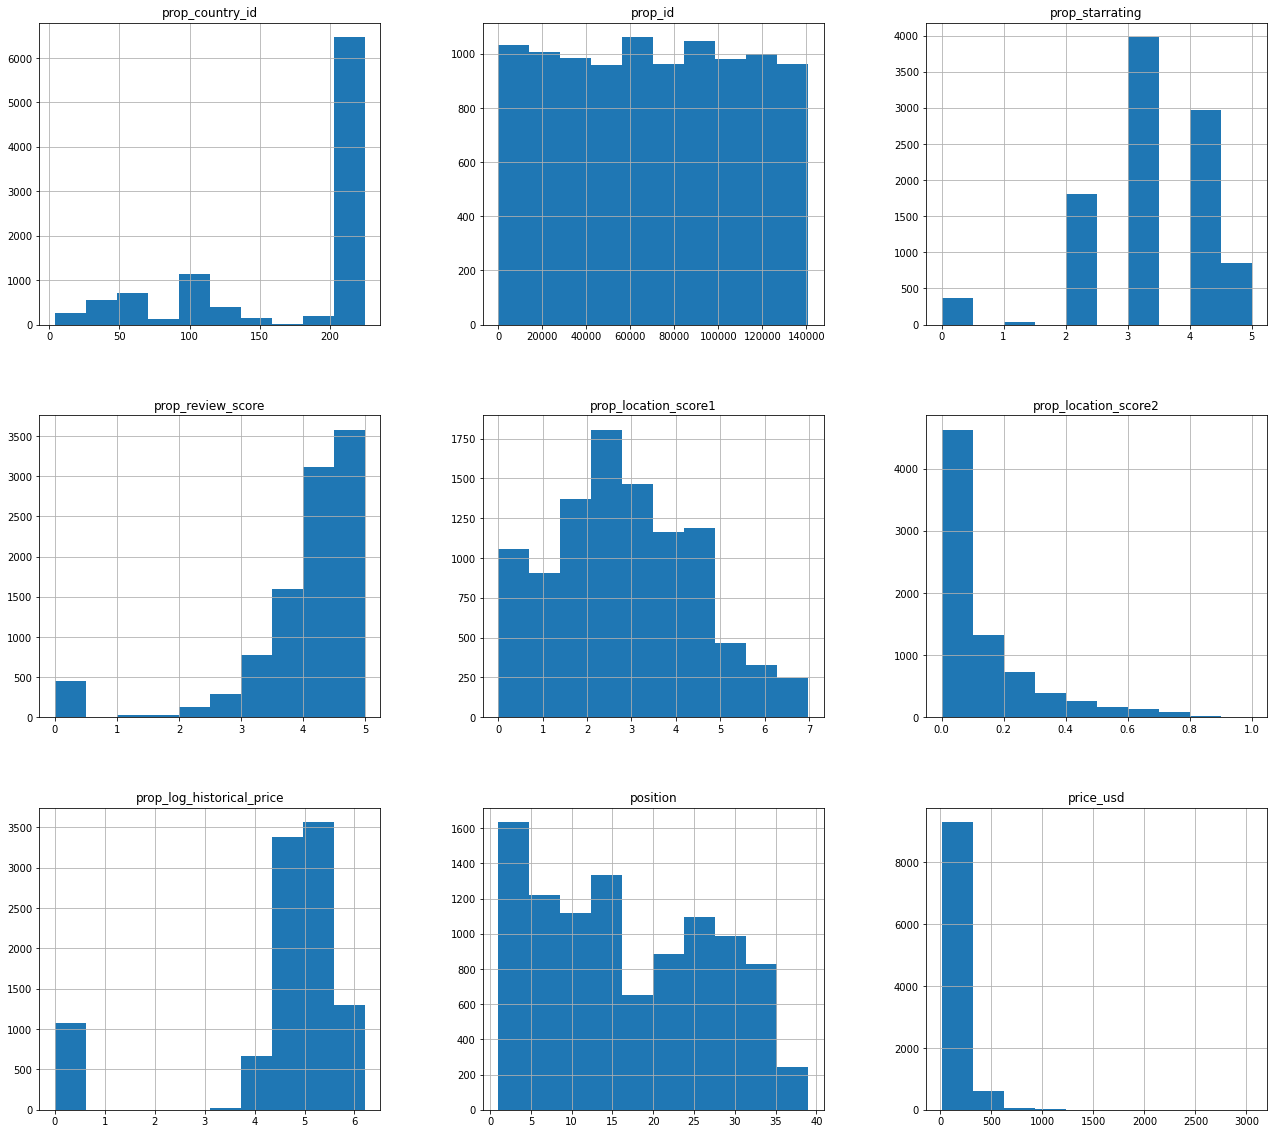

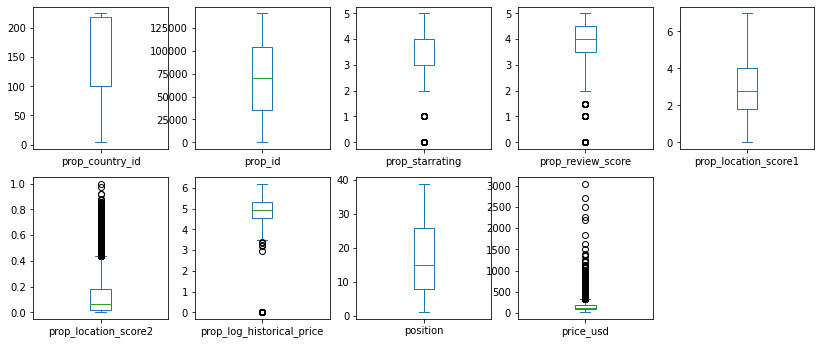

In [58]:
#non-category data: 'prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd'
data2NonCat=data2.loc[:,['prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd']]
data2NonCat.hist(figsize=(22,20))
data2NonCat.plot(kind='box', subplots=True, layout=(4,5),figsize=(14,12))

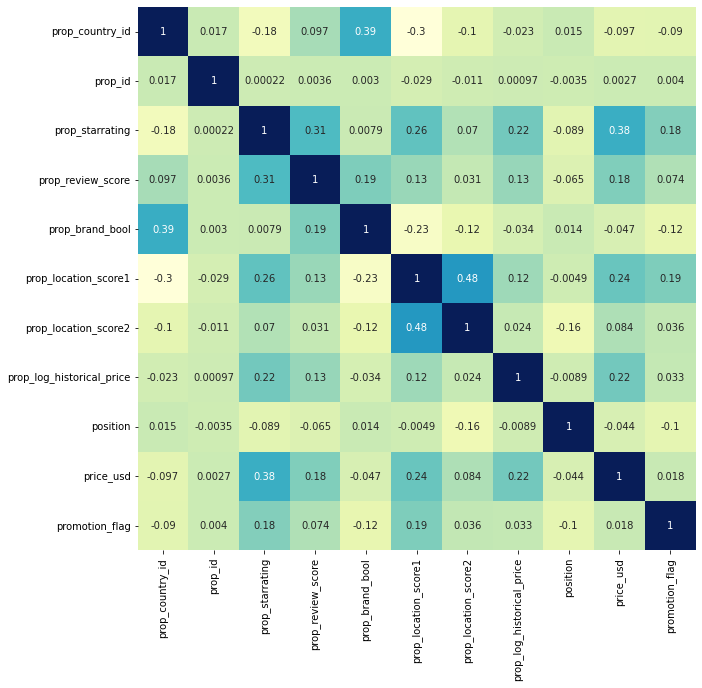

In [52]:
#corr graph
corr2= data2.corr()
ax2 = sns.heatmap(corr2, annot = True, cmap="YlGnBu", cbar=False)
plt.setp(ax2.axes.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize']=(10,10)

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'